<a href="https://colab.research.google.com/github/HosnawHb/KNN_and_Naive_Bayes/blob/main/CA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [434]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error
import seaborn as sns
from sklearn.metrics import f1_score
import numpy as np
from sklearn.naive_bayes import GaussianNB
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

# Data Loading

In [435]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'

In [436]:
column = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell_weight','Rings']

In [437]:
df = pd.read_csv(url,names=column)

In [438]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [439]:
categorical = ['Sex']
le = LabelEncoder()
df[categorical] = df[categorical].apply(le.fit_transform, axis=0)

In [440]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Confusion Matrix

In [441]:
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes, xticklabels=classes,
                cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

# 1.

## PreProcess

In [442]:
y = df['Sex']
X = df.drop(['Sex'],axis=1)

In [443]:
X.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [444]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [445]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## KNN Classification

### Finding The Best K For KNN Classification

In [446]:
f1s=[]
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    f1s.append(f1_score(y_test, pred_i, average='weighted'))


Text(0, 0.5, 'F1 Score')

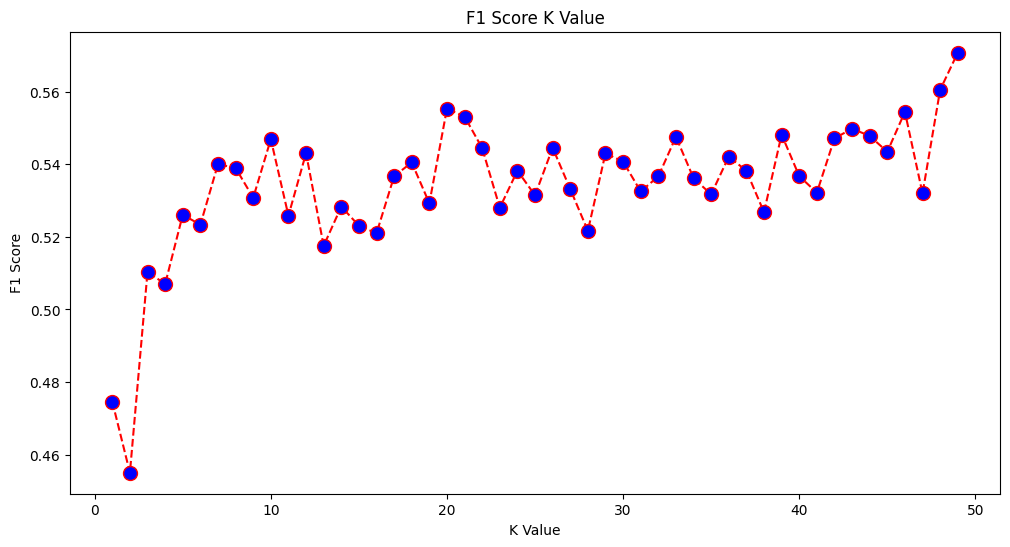

In [447]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In [448]:
k = [i for i in range (0,50)]
maxF1 = np.argmax(f1s)
BestK = k[maxF1]
print(BestK)

48


In [449]:
classifier48 = KNeighborsClassifier(n_neighbors=BestK)
classifier48.fit(X_train, y_train)
y_pred48 = classifier48.predict(X_test)
print(classification_report(y_test, y_pred48))

              precision    recall  f1-score   support

           0       0.49      0.40      0.44       131
           1       0.68      0.81      0.74       126
           2       0.52      0.52      0.52       161

    accuracy                           0.57       418
   macro avg       0.56      0.58      0.57       418
weighted avg       0.56      0.57      0.56       418



## K-Fold

In [450]:
XF = X.to_numpy()
yF = y.to_numpy()

In [451]:
kf = KFold(n_splits = 10)
cnt =1
report = []
for train, test in kf.split(XF,yF):
   X_trainF, X_testF, y_trainF, y_testF = XF[train], XF[test], yF[train], yF[test]
   knn = KNeighborsClassifier(n_neighbors=BestK)
   knn.fit(X_trainF, y_trainF)
   y_predF = knn.predict(X_testF)
   print('Fold',cnt,':')
   print(classification_report(y_testF, y_predF))
   print('-----------------------------------------------')
   report.append(classification_report(y_testF, y_predF, output_dict=True))
   cnt = cnt+1

Fold 1 :
              precision    recall  f1-score   support

           0       0.45      0.32      0.37       164
           1       0.42      0.85      0.56        78
           2       0.47      0.38      0.42       176

    accuracy                           0.44       418
   macro avg       0.44      0.51      0.45       418
weighted avg       0.45      0.44      0.43       418

-----------------------------------------------
Fold 2 :
              precision    recall  f1-score   support

           0       0.39      0.29      0.33       144
           1       0.44      0.51      0.47       114
           2       0.38      0.42      0.40       160

    accuracy                           0.40       418
   macro avg       0.40      0.41      0.40       418
weighted avg       0.40      0.40      0.40       418

-----------------------------------------------
Fold 3 :
              precision    recall  f1-score   support

           0       0.45      0.42      0.43       113
      

In [452]:
Acc=[]
Precision=[]
Recall=[]
F1Score=[]
for r in report:
  Acc.append(r['accuracy'])
  Precision.append(r['weighted avg']['precision'])
  Recall.append(r['weighted avg']['recall'])
  F1Score.append(r['weighted avg']['f1-score'])
print('Average Accuracy cross-validation score:',np.mean(Acc))
print('Average Precision cross-validation score:',np.mean(Precision))
print('Average Recall cross-validation score:',np.mean(Recall))
print('Average f1_score cross-validation score:',np.mean(F1Score))


Average Accuracy cross-validation score: 0.5257438068683808
Average Precision cross-validation score: 0.526666285271771
Average Recall cross-validation score: 0.5257438068683808
Average f1_score cross-validation score: 0.5206245145635493


## Model_Eval

In [453]:
knn = KNeighborsClassifier(n_neighbors=BestK)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Test score 0.569377990430622
Test Confusion matrix


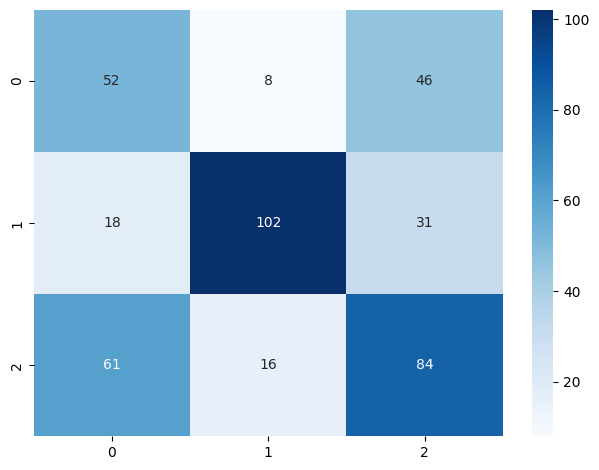

In [454]:
classes = ['0','1','2']
print(f'Test score {accuracy_score(y_pred,y_test)}')
plot_confusionmatrix(y_pred,y_test,dom='Test')

In [455]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.40      0.44       131
           1       0.68      0.81      0.74       126
           2       0.52      0.52      0.52       161

    accuracy                           0.57       418
   macro avg       0.56      0.58      0.57       418
weighted avg       0.56      0.57      0.56       418



## NB

In [456]:
kf = KFold(n_splits = 10)
cnt =1
report = []
for train, test in kf.split(XF,yF):
   X_trainF, X_testF, y_trainF, y_testF = XF[train], XF[test], yF[train], yF[test]
   gnb = GaussianNB()
   gnb.fit(X_trainF, y_trainF)
   y_predF = gnb.predict(X_testF)
   print('Fold',cnt,':')
   print(classification_report(y_testF, y_predF))
   print('-----------------------------------------------')
   report.append(classification_report(y_testF, y_predF, output_dict=True))
   cnt = cnt+1

Fold 1 :
              precision    recall  f1-score   support

           0       0.48      0.53      0.51       164
           1       0.41      1.00      0.59        78
           2       0.44      0.12      0.19       176

    accuracy                           0.45       418
   macro avg       0.45      0.55      0.43       418
weighted avg       0.45      0.45      0.39       418

-----------------------------------------------
Fold 2 :
              precision    recall  f1-score   support

           0       0.52      0.38      0.44       144
           1       0.39      0.75      0.51       114
           2       0.42      0.26      0.32       160

    accuracy                           0.43       418
   macro avg       0.45      0.46      0.42       418
weighted avg       0.45      0.43      0.41       418

-----------------------------------------------
Fold 3 :
              precision    recall  f1-score   support

           0       0.48      0.75      0.58       113
      

In [457]:
Acc=[]
Precision=[]
Recall=[]
F1Score=[]
for r in report:
  Acc.append(r['accuracy'])
  Precision.append(r['weighted avg']['precision'])
  Recall.append(r['weighted avg']['recall'])
  F1Score.append(r['weighted avg']['f1-score'])
print('Average Accuracy cross-validation score:',np.mean(Acc))
print('Average Precision cross-validation score:',np.mean(Precision))
print('Average Recall cross-validation score:',np.mean(Recall))
print('Average f1_score cross-validation score:',np.mean(F1Score))


Average Accuracy cross-validation score: 0.5183223755923491
Average Precision cross-validation score: 0.5250662853998318
Average Recall cross-validation score: 0.5183223755923491
Average f1_score cross-validation score: 0.48236509050621673


## Model_Eval

In [458]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

Test score 0.5119617224880383
Test Confusion matrix


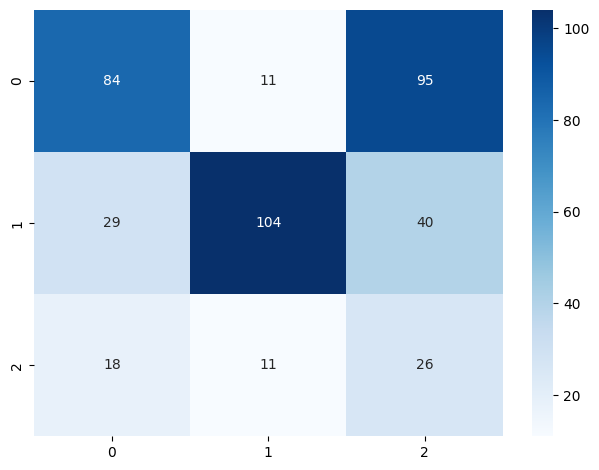

In [459]:
classes = ['0','1','2']
print(f'Test score {accuracy_score(y_pred,y_test)}')
plot_confusionmatrix(y_pred,y_test,dom='Test')

In [460]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.64      0.52       131
           1       0.60      0.83      0.70       126
           2       0.47      0.16      0.24       161

    accuracy                           0.51       418
   macro avg       0.51      0.54      0.49       418
weighted avg       0.50      0.51      0.47       418



### Cost_Sensitive

In [461]:
class NaiveBayesCostSensitive:
    def __init__(self, alpha=1., cost_ratio=5.):
        self.alpha = alpha
        self.cost_ratio = cost_ratio

    def fit(self, X, y):
        self.classes, self.class_counts = np.unique(y, return_counts=True)
        self.n_classes = len(self.classes)
        self.n_features = X.shape[1]
        self.feature_counts = np.zeros((self.n_classes, self.n_features))

        for i, c in enumerate(self.classes):
            X_c = X[y==c]
            self.feature_counts[i, :] = np.sum(X_c, axis=0)

        self.prior = self.class_counts / np.sum(self.class_counts)
        self.feature_probs = (self.feature_counts + self.alpha) / \
            (np.sum(self.feature_counts, axis=1, keepdims=True) + self.alpha * self.n_features)

    def predict(self, X):
        n_samples = X.shape[0]
        log_probs = np.zeros((n_samples, self.n_classes))

        for i in range(self.n_classes):
            class_prob = self.prior[i]
            for j in range(self.n_features):
                feature_prob = self.feature_probs[i, j]
                log_likelihood = np.log(feature_prob) * X[:, j] + \
                                 np.log(1 - feature_prob) * (1 - X[:, j])
                log_prob_feature = np.sum(log_likelihood)
                log_probs[:, i] += log_prob_feature

            log_probs[:, i] += np.log(class_prob) * self.cost_ratio
            log_probs[:, i] -= np.log(1 - class_prob)

        y_pred = self.classes[np.argmin(log_probs, axis=1)]

        return y_pred


In [462]:
clf = NaiveBayesCostSensitive(alpha=1., cost_ratio=5.)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       131
           1       0.00      0.00      0.00       126
           2       0.39      1.00      0.56       161

    accuracy                           0.39       418
   macro avg       0.13      0.33      0.19       418
weighted avg       0.15      0.39      0.21       418



# 2.

## PreProcess

In [463]:
y = df['Rings']
X = df.drop(['Rings'],axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell_weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [464]:
classes = np.unique(df["Rings"])

In [465]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [466]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## KNN

## Finding The Best K For KNN Classification 2

In [467]:
f1s=[]
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Text(0, 0.5, 'F1 Score')

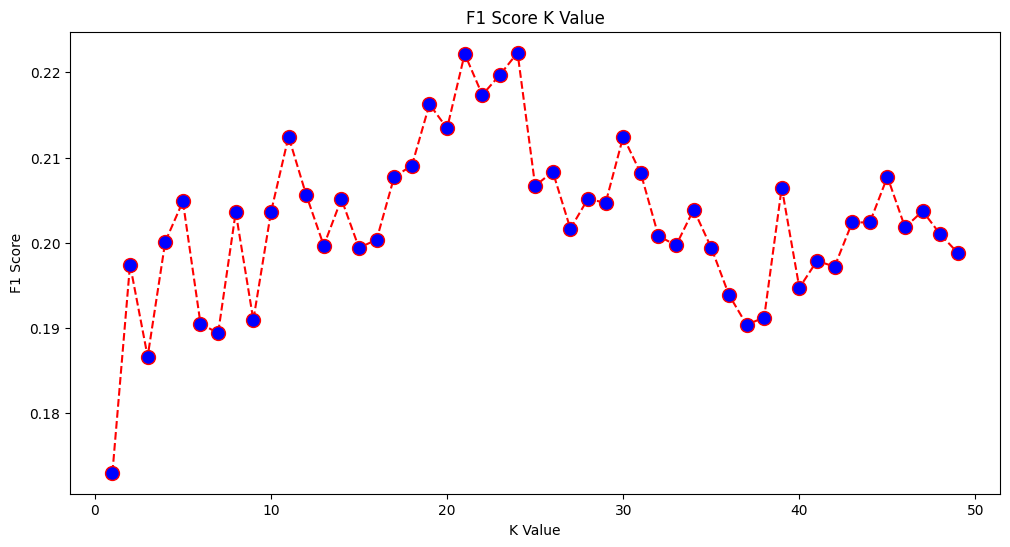

In [468]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In [469]:
k = [i for i in range (0,50)]
maxF1 = np.argmax(f1s)
BestK = k[maxF1]
print(BestK)

23


In [470]:
classifier23 = KNeighborsClassifier(n_neighbors=23)
classifier23.fit(X_train, y_train)
y_pred23 = classifier23.predict(X_test)
print(classification_report(y_test, y_pred23,zero_division=0))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.25      0.50      0.33         4
           5       0.17      0.12      0.14         8
           6       0.28      0.33      0.30        24
           7       0.28      0.28      0.28        39
           8       0.17      0.29      0.22        49
           9       0.25      0.24      0.24        74
          10       0.27      0.41      0.33        71
          11       0.22      0.26      0.24        43
          12       0.50      0.15      0.23        33
          13       0.00      0.00      0.00        16
          14       0.00      0.00      0.00        15
          15       0.00      0.00      0.00        12
          16       0.33      0.12      0.18         8
          17       0.00      0.00      0.00         5
          18       0.00      0.00      0.00         7
          19       0.00      0.00      0.00         3
          20       0.00    

## K-Fold

In [471]:
XF = X.to_numpy()
yF = y.to_numpy()

In [472]:
kf = KFold(n_splits = 10)
cnt =1
report = []
for train, test in kf.split(XF,yF):
   X_trainF, X_testF, y_trainF, y_testF = XF[train], XF[test], yF[train], yF[test]
   knn = KNeighborsClassifier(n_neighbors=BestK)
   knn.fit(X_trainF, y_trainF)
   y_predF = knn.predict(X_testF)
   print('Fold',cnt,':')
   print(classification_report(y_testF, y_predF,zero_division=0))
   print('-----------------------------------------------')
   report.append(classification_report(y_testF, y_predF, output_dict=True,zero_division=0))
   cnt = cnt+1

Fold 1 :
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.42      0.62      0.50         8
           5       0.50      0.46      0.48        13
           6       0.24      0.67      0.36        12
           7       0.25      0.17      0.20        35
           8       0.20      0.25      0.23        36
           9       0.14      0.31      0.19        49
          10       0.14      0.27      0.18        55
          11       0.03      0.03      0.03        32
          12       0.10      0.05      0.07        38
          13       0.21      0.11      0.14        28
          14       0.00      0.00      0.00        28
          15       0.00      0.00      0.00        23
          16       0.00      0.00      0.00        16
          17       0.00      0.00      0.00         6
          18       0.00      0.00      0.00         7
          19      

In [473]:
Acc=[]
Precision=[]
Recall=[]
F1Score=[]
for r in report:
  Acc.append(r['accuracy'])
  Precision.append(r['weighted avg']['precision'])
  Recall.append(r['weighted avg']['recall'])
  F1Score.append(r['weighted avg']['f1-score'])
print('Average Accuracy cross-validation score:',np.mean(Acc))
print('Average Precision cross-validation score:',np.mean(Precision))
print('Average Recall cross-validation score:',np.mean(Recall))
print('Average f1_score cross-validation score:',np.mean(F1Score))

Average Accuracy cross-validation score: 0.2556894197560612
Average Precision cross-validation score: 0.24523634603844607
Average Recall cross-validation score: 0.2556894197560612
Average f1_score cross-validation score: 0.23845617036967598


## Model_Eval

In [474]:
knn = KNeighborsClassifier(n_neighbors=BestK)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Test score 0.23923444976076555
Test Confusion matrix


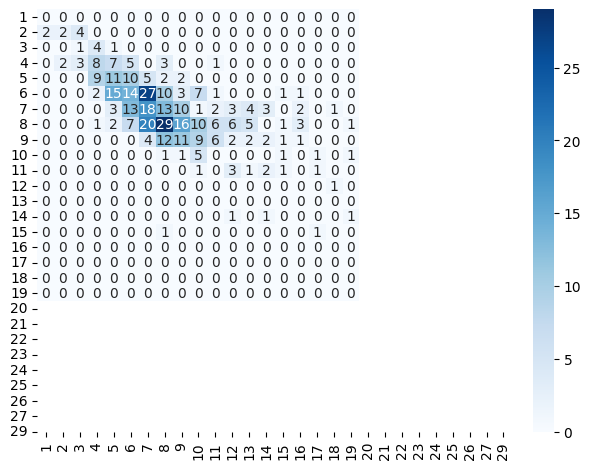

In [475]:
print(f'Test score {accuracy_score(y_pred,y_test)}')
plot_confusionmatrix(y_pred,y_test,dom='Test')

## NB

In [476]:
kf = KFold(n_splits = 10)
cnt =1
report = []
for train, test in kf.split(XF,yF):
   X_trainF, X_testF, y_trainF, y_testF = XF[train], XF[test], yF[train], yF[test]
   gnb = GaussianNB()
   gnb.fit(X_trainF, y_trainF)
   y_predF = gnb.predict(X_testF)
   print('Fold',cnt,':')
   print(classification_report(y_testF, y_predF,zero_division=0))
   print('-----------------------------------------------')
   report.append(classification_report(y_testF, y_predF,zero_division=0,output_dict=True))
   cnt = cnt+1

Fold 1 :
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.29      0.67      0.40         3
           4       0.29      0.50      0.36         8
           5       0.14      0.31      0.20        13
           6       0.12      0.42      0.19        12
           7       0.14      0.23      0.17        35
           8       0.13      0.19      0.16        36
           9       0.10      0.18      0.13        49
          10       0.07      0.04      0.05        55
          11       0.06      0.09      0.07        32
          12       0.00      0.00      0.00        38
          13       0.00      0.00      0.00        28
          14       0.00      0.00      0.00        28
          15       0.00      0.00      0.00        23
          16       0.00      0.00      0.00        16
          17       0.00      0.00      0.00         6
          18       0.00      0.00      0.00         7
          19      

In [477]:
Acc=[]
Precision=[]
Recall=[]
F1Score=[]
for r in report:
  Acc.append(r['accuracy'])
  Precision.append(r['weighted avg']['precision'])
  Recall.append(r['weighted avg']['recall'])
  F1Score.append(r['weighted avg']['f1-score'])
print('Average Accuracy cross-validation score:',np.mean(Acc))
print('Average Precision cross-validation score:',np.mean(Precision))
print('Average Recall cross-validation score:',np.mean(Recall))
print('Average f1_score cross-validation score:',np.mean(F1Score))


Average Accuracy cross-validation score: 0.23846224455842027
Average Precision cross-validation score: 0.21833174419731205
Average Recall cross-validation score: 0.23846224455842027
Average f1_score cross-validation score: 0.2148453197337902


## Model_Eval

In [478]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

Test score 0.21291866028708134
Test Confusion matrix


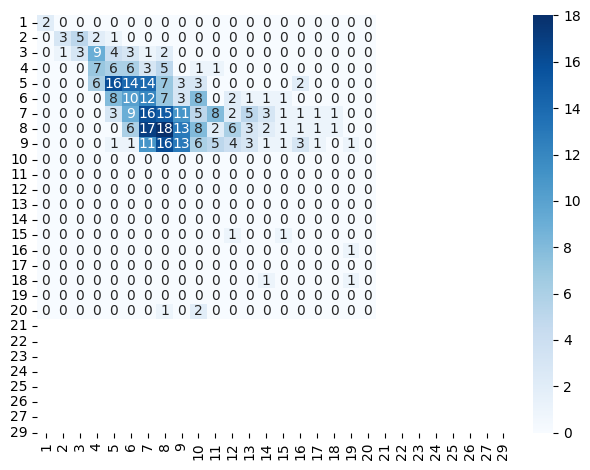

In [479]:
print(f'Test score {accuracy_score(y_pred,y_test)}')
plot_confusionmatrix(y_pred,y_test,dom='Test')

In [480]:
print(classification_report(y_test, y_pred,zero_division=0))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         2
           4       0.27      0.75      0.40         4
           5       0.13      0.38      0.19         8
           6       0.24      0.29      0.26        24
           7       0.25      0.41      0.31        39
           8       0.19      0.20      0.20        49
           9       0.20      0.22      0.21        74
          10       0.23      0.25      0.24        71
          11       0.19      0.30      0.24        43
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00        16
          14       0.00      0.00      0.00        15
          15       0.00      0.00      0.00        12
          16       0.00      0.00      0.00         8
          17       0.50      0.20      0.29         5
          18       0.00      0.00      0.00         7
          19       0.00      0.00      0.00         3
          20       0.00    